In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-internship-prodigy/bank-additional.csv
/kaggle/input/bank-internship-prodigy/bank.csv
/kaggle/input/bank-internship-prodigy/bank-full.csv
/kaggle/input/bank-internship-prodigy/bank-additional-full.csv
/kaggle/input/bank-marketing-dataset/bank.csv


# Dataloading

In [2]:
dataset = pd.read_csv('/kaggle/input/bank-internship-prodigy/bank-full.csv',sep= ';')
# Lets take the full data 
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Handling Duplicates and Missing Values

In [4]:
dataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='age', ylabel='Density'>

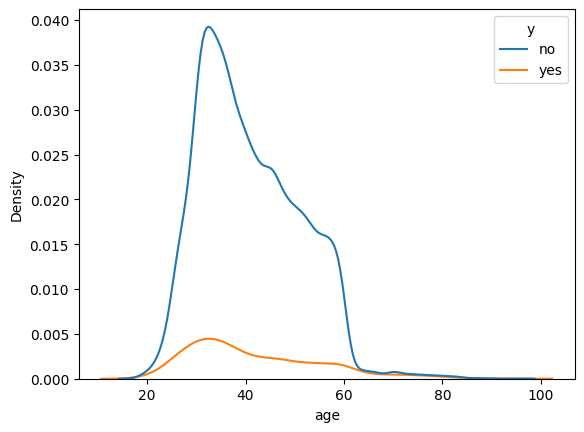

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(x = 'age', hue = 'y', data = dataset)

So the most people near 35-40 didn't buy the product, but most of peoeple who baught it have more uniform distribution. Hence middleage people are less eager to buy it.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='balance', ylabel='Density'>

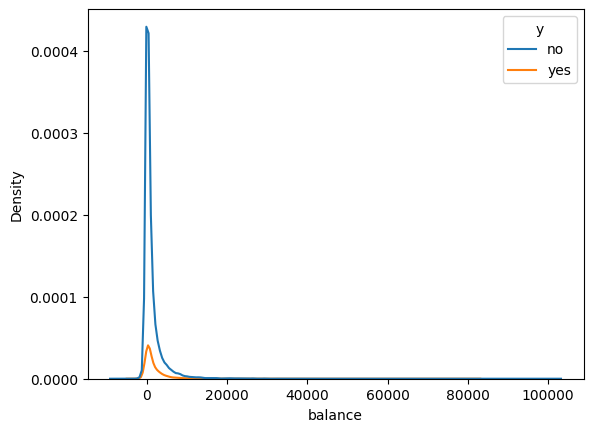

In [6]:
sns.kdeplot(x = 'balance', hue = 'y', data = dataset)

# Variation of balance for people who bought the product and didnt buy it

<Axes: xlabel='previous'>

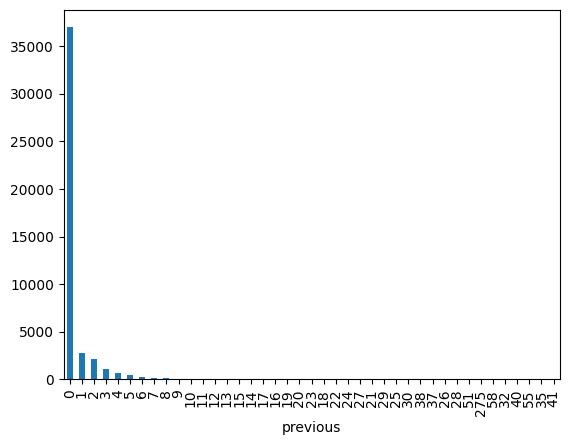

In [7]:
dataset['previous'].value_counts().plot(kind = 'bar') 
# No of times the customer was contacted before

# Handling some special features

Since the description on UCI states :  

duration should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model,

We are going to discard it.


In [8]:
dataset.drop('duration', axis = 1, inplace = True)

In [9]:
dataset['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [10]:
dataset['day'].value_counts()

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64

**The day** feature represents the day of the month the contact was made. 

While it is numerical, it is not ordinal in a meaningful way for modeling purposes because the day of the month may not inherently affect the target variable. 

However, since it is already numerical, normalization is a straightforward approach.

**The month** feature represents the month the contact was made and is categorical. It should be one-hot encoded.

# One Hot Encoding (Categorical features)

In [11]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


Note : for dummies of every feature, 1st dummy should be eliminated to reduce redundancy/ multicolinearity.

In [12]:
dataset = pd.get_dummies(dataset, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome', 'y'],drop_first = True)

In [13]:
# Note that this changes to y to y_yes (because we used OHE)
dataset.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,1,-1,0,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,1,-1,0,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,1,-1,0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


# Test Spliting and Normalization

In [14]:
X = dataset.drop(columns=['y_yes']) #Note that target feature name was changed
y = dataset['y_yes']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['age','balance', 'day', 'campaign', 'pdays', 'previous']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [17]:
X_train.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3344,0.006515,-0.169381,-0.098218,-0.565886,-0.411364,-0.244772,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17965,0.759937,0.017848,1.703422,-0.245389,-0.411364,-0.244772,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
18299,0.100693,0.820681,1.823532,0.395606,-0.411364,-0.244772,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
10221,-0.370196,-0.489588,-0.578656,2.639088,-0.411364,-0.244772,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
32192,1.419181,0.706889,-0.098218,-0.245389,-0.411364,-0.244772,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# Model Building

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(" accuracy : ", accuracy_score(y_test, y_pred))
print(" classification report : \n", classification_report(y_test, y_pred))

 accuracy :  0.8342364259648347
 classification report : 
               precision    recall  f1-score   support

       False       0.91      0.90      0.91      7952
        True       0.32      0.34      0.33      1091

    accuracy                           0.83      9043
   macro avg       0.61      0.62      0.62      9043
weighted avg       0.84      0.83      0.84      9043



In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8919606325334513
Classification report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94      7952
        True       0.62      0.26      0.37      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043



In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8928452947030853
Classification report:
               precision    recall  f1-score   support

       False       0.90      0.99      0.94      7952
        True       0.67      0.22      0.33      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.60      0.64      9043
weighted avg       0.87      0.89      0.87      9043



In [21]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(random_state=42, verbose=0)
cat_clf.fit(X_train, y_train)

y_pred = cat_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8935087913303107
Classification report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94      7952
        True       0.65      0.25      0.36      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043

